# This notebook explores a variety of training methods

## Imports 
<hr>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import math


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [4]:
def plotRegression(truth, pred):
    plt.figure(figsize=(10,10))
    plt.scatter(truth, pred)
    plt.grid()
    plt.xlabel("Truth")
    plt.ylabel("Predicted")
    plt.title("Truth Plotted against actual value")
    plt.plot([0,1], [0,1], 'r')
    plt.show()

## Load the data
<hr>

In [ ]:
####### Scaled by dividing data in each column by maximum value #######
data_filename = '/Users/brad/Desktop/CS6620/Project/Data/dataVersion1.npy' 
truth_filename = '/Users/brad/Desktop/CS6620/Project/Data/truthVersion1.npy' 

In [4]:
############## This data has not been normalized/scaled at all ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledData.npy' 
truthUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledTruth.npy' 

In [7]:
############## This data has not been normalized/scaled at all ###################
############## This data Has extra columns for month, hour, day, solar elevation, azimuth, zenith ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledDataV2.npy' 
truthUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledTruthV2.npy' 

In [5]:
############## This data has not been normalized/scaled at all ###################
############## This data has been fixed on the generation side ###################
dataUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledDataV3.npy' 
truthUnscaled_filename = '/Users/brad/Desktop/CS6620/Project/Data/nonScaledTruthV3.npy' 

In [86]:
### These are hours that no corrupt data at all 
dataUnscaled_filename ='/Users/brad/Desktop/CS6620/Project/Data/nonAdjustedData.npy'
# If we don't consider this a time series problem, we can do a random split
from sklearn.model_selection import train_test_split
data = np.load(dataUnscaled_filename)
train, test = train_test_split(data, train_size=0.8, shuffle=False)

x_train = train[:, 0:-1].reshape(-1, 41)
y_train = train[:, -1].reshape(-1,1)
x_test = test[:, 0:-1].reshape(-1, 41)
y_test = test[:, -1].reshape(-1,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2360, 41)
(2360, 1)
(591, 41)
(591, 1)


In [6]:
x = np.load(dataUnscaled_filename)
y = np.load(truthUnscaled_filename)
print('Before split')
print(x.shape)
print(y.shape)

Before split
(5267, 41)
(5267,)


In [7]:
train_length = int(x.shape[0] * 0.85)
x_train = x[0 : train_length].reshape(-1, x.shape[1])
y_train = y[0 : train_length].reshape(-1,1)
x_test = x[train_length : ].reshape(-1, x.shape[1])
y_test = y[train_length : ].reshape(-1,1)
print('After split and reshape')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

After split and reshape
(4476, 41)
(4476, 1)
(791, 41)
(791, 1)


## Explore different methods of scaling 
<hr>

In [9]:
# Scale 
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.fit_transform(x_test)
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

In [97]:
# MinMaxScale a different way
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
x_train = scalerX.fit_transform(x_train)
x_test = scalerX.fit_transform(x_test)
y_train = scalerY.fit_transform(y_train)
y_test = scalerY.fit_transform(y_test)

## Fit with KNN
<hr>

In [15]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt


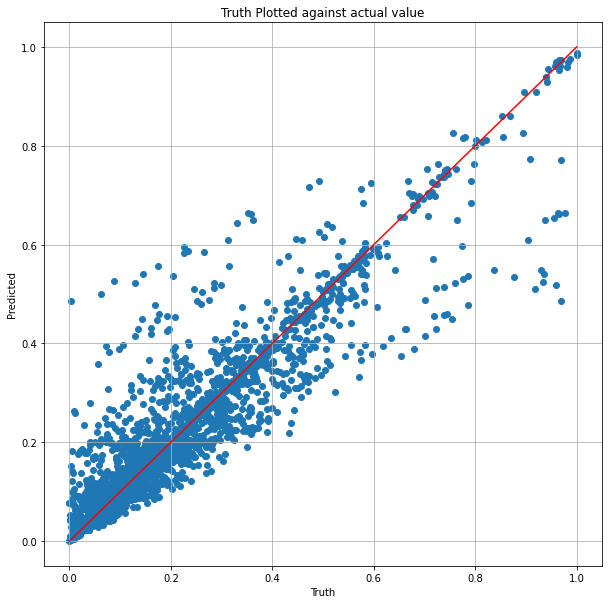

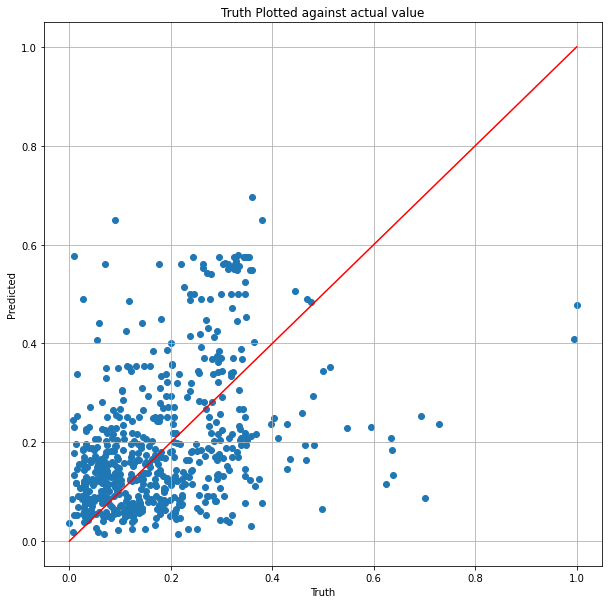

In [98]:
KNNmodel = neighbors.KNeighborsRegressor(n_neighbors = 2)
KNNmodel.fit(x_train, y_train)  #fit the model
test_pred_knn = KNNmodel.predict(x_test) #make prediction on test set
train_pred_knn = KNNmodel.predict(x_train)
plotRegression(y_train, train_pred_knn)
plotRegression(y_test, test_pred_knn)

In [99]:
print( r2_score(y_train, train_pred_knn) )
print( r2_score(y_test, test_pred_knn) )

0.8321836389801903
-0.29109456604967354


## Try fitting the data with RandomForestRegressors
<hr>

In [89]:
regressor = RandomForestRegressor(n_estimators=100, random_state=2)
regressor.fit(x_train, y_train)

<ipython-input-89-4d35941cbd4c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=2)

In [90]:
# Training data r^2 value 
y_train_pred = regressor.predict(x_train)
r2_score(y_train, y_train_pred)

0.9658240375660871

In [91]:
# testing data r^2 value 
y_test_pred = regressor.predict(x_test)
r2_score(y_test, y_test_pred)

-0.006466708006134025

In [92]:
def computeAverageError(pred, y):
    err = []
    for i in range(len(pred)):
        err.append(abs((y[i] - pred[i])/(y[i] + 1e-6)))

    return sum(err)/ len(err)

In [93]:
computeAverageError(y_test_pred, y_test)

array([1.69824761])

In [94]:
computeAverageError(y_train_pred, y_train)

array([0.4390503])

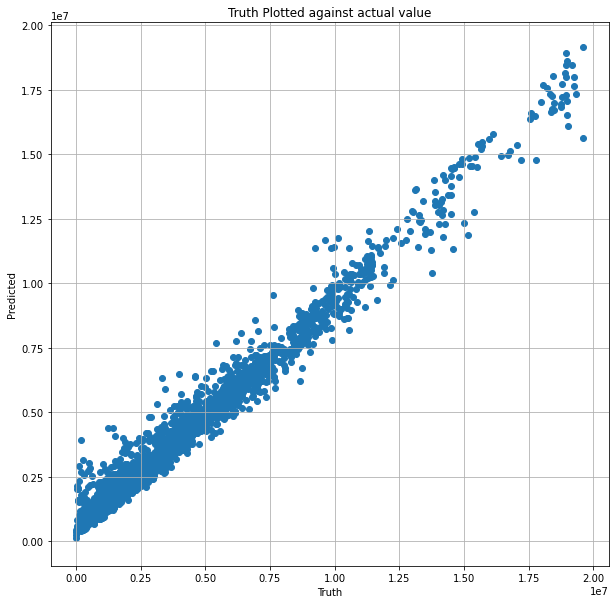

In [95]:
plotRegression(y_train, y_train_pred)

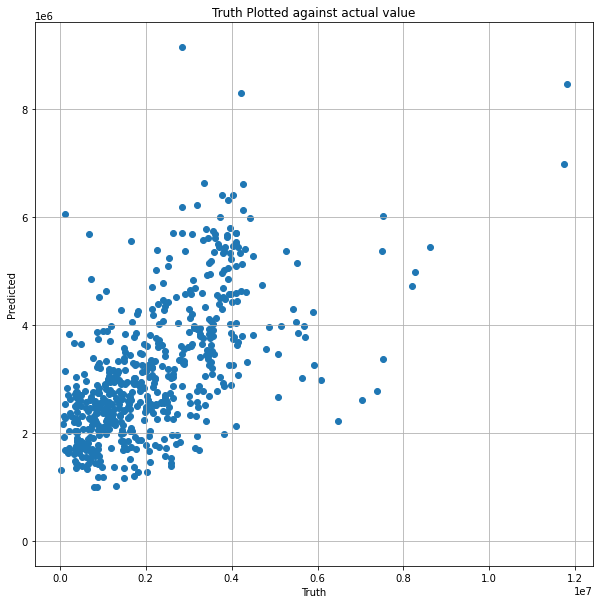

In [96]:
plotRegression(y_test, y_test_pred)

## Support Vector Regression 
<hr>

In [26]:
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.fit_transform(x_test)
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

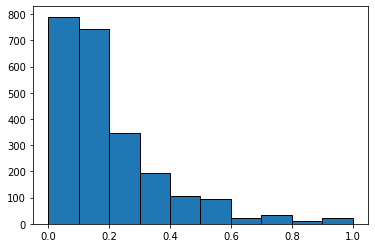

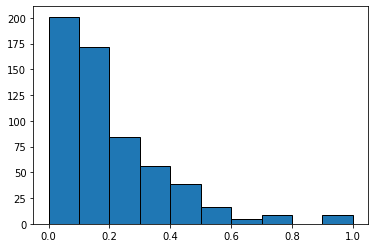

In [27]:
plt.figure()
plt.hist(y_train, edgecolor='black')
plt.show()
plt.figure()
plt.hist(y_test, edgecolor='black')
plt.show()

### Before transform, data has range () after transform, from from (-1,5) (Using Standard scaler)
### Using MinMaxScaler gives range between 0-1


In [28]:
# Reshape Y 
print('Before reshaping: ')
print(y_train.shape)
print(y_test.shape)

y_train = y_train.flatten()
y_test = y_test.flatten()
print('After reshaping: ')
print(y_train.shape)
print(y_test.shape)

Before reshaping: 
(2360, 1)
(591, 1)
After reshaping: 
(2360,)
(591,)


In [29]:
regressorSVR = SVR(kernel='rbf')
regressorSVR.fit(x_train, y_train)

SVR()

In [30]:
y_train_pred_svr = regressorSVR.predict(x_train)
y_test_pred_svr = regressorSVR.predict(x_test)

In [31]:
print(r2_score(y_train, y_train_pred_svr))
print(r2_score(y_test, y_test_pred_svr))

0.6668136726350844
0.5777466911534052


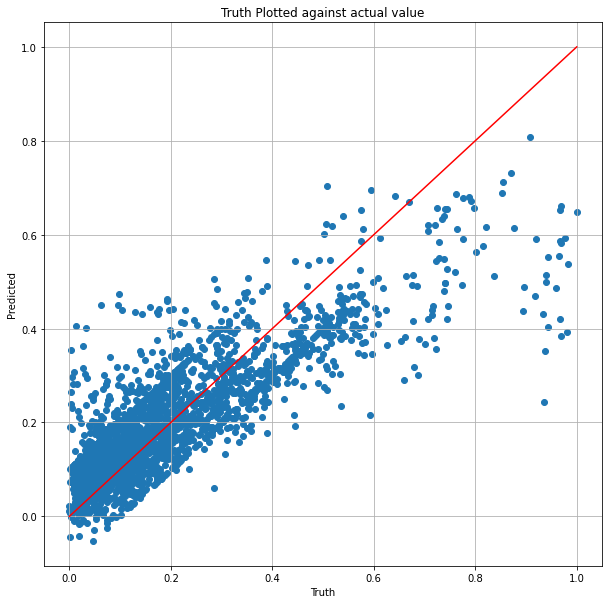

In [32]:
plotRegression(truth=y_train, pred=y_train_pred_svr)

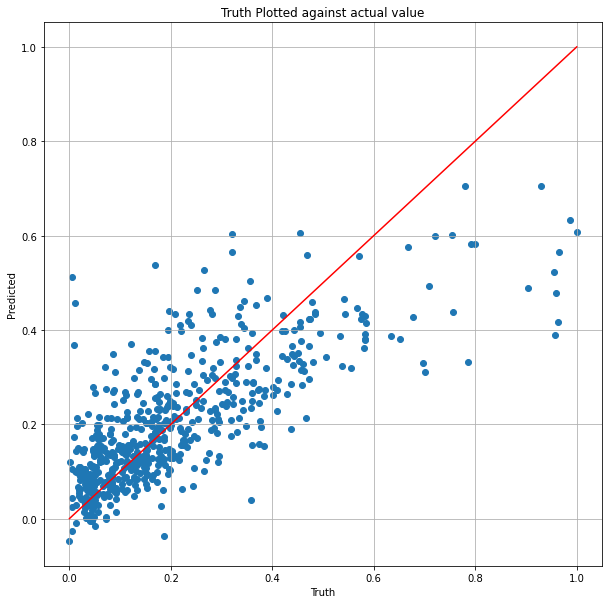

In [33]:
plotRegression(truth=y_test, pred=y_test_pred_svr)

## Using keras RNN
<hr>

In [34]:
import tensorflow as tf 
from tensorflow import keras
from keras import backend as K
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.layers.experimental import preprocessing

In [35]:
# not sure if this is right. 
def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [58]:
#LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1],1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
# optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=0.01, decay=1e-5)
# compile
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[coeff_determination])

In [71]:
# ann Model
model = Sequential()
model.add(Dense(20, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
# model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
# optimizer 
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# compile
model.compile(loss='mean_squared_error', optimizer=opt, metrics=[coeff_determination])

In [39]:
def plot_loss(history):
  plt.figure()
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.figure()
  plt.plot(history.history['coeff_determination'], label='R^2')
  plt.plot(history.history['val_coeff_determination'], label='validation R^2')
  plt.xlabel('Epoch')
  plt.ylabel('R^2')
  plt.legend()
  plt.show()

In [65]:
x_train = x_train.reshape(-1,x_train.shape[1],)
x_test = x_test.reshape(-1,x_train.shape[1],)

In [42]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

eff_determination: 0.6526 - val_loss: 0.0124 - val_coeff_determination: 0.5774
Epoch 881/1000
74/74 [==============================] - 0s 2ms/step - loss: 0.0098 - coeff_determination: 0.6470 - val_loss: 0.0144 - val_coeff_determination: 0.5025
Epoch 882/1000
74/74 [==============================] - 0s 1ms/step - loss: 0.0094 - coeff_determination: 0.6606 - val_loss: 0.0129 - val_coeff_determination: 0.5669
Epoch 883/1000
74/74 [==============================] - 0s 1ms/step - loss: 0.0103 - coeff_determination: 0.6277 - val_loss: 0.0120 - val_coeff_determination: 0.5979
Epoch 884/1000
74/74 [==============================] - 0s 1ms/step - loss: 0.0107 - coeff_determination: 0.6266 - val_loss: 0.0128 - val_coeff_determination: 0.5789
Epoch 885/1000
74/74 [==============================] - 0s 1ms/step - loss: 0.0093 - coeff_determination: 0.6608 - val_loss: 0.0121 - val_coeff_determination: 0.5925
Epoch 886/1000
74/74 [==============================] - 0s 2ms/step - loss: 0.0098 - coeff_

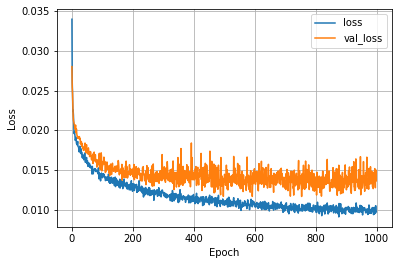

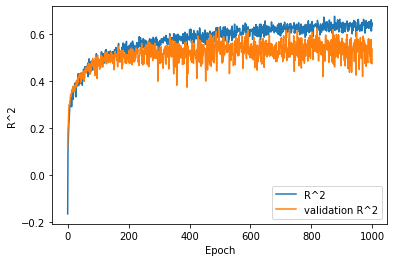

In [72]:
history= model.fit(x=x_train, y=y_train, epochs=1000, validation_data=(x_test, y_test),batch_size=32,verbose=1)
plot_loss(history)

In [73]:
y_pred_train_LSTM = model.predict(x_train)
print(r2_score(y_train, y_pred_train_LSTM))
y_pred_test_LSTM = model.predict(x_test)
print(r2_score(y_test, y_pred_test_LSTM))

0.7438147574534288
0.5991560555006864


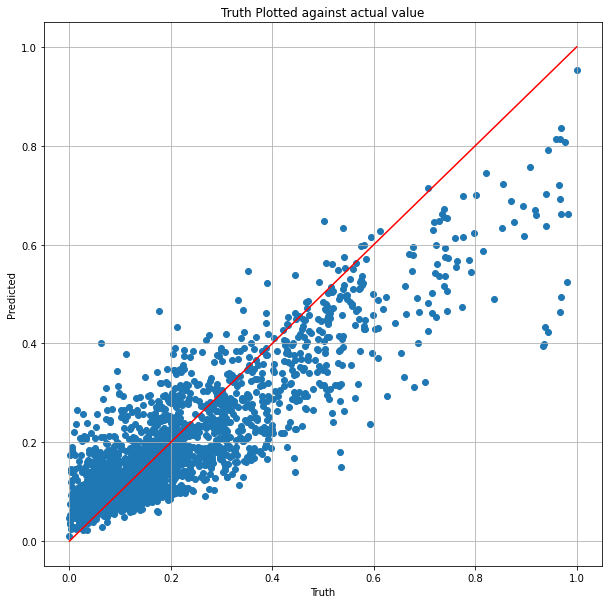

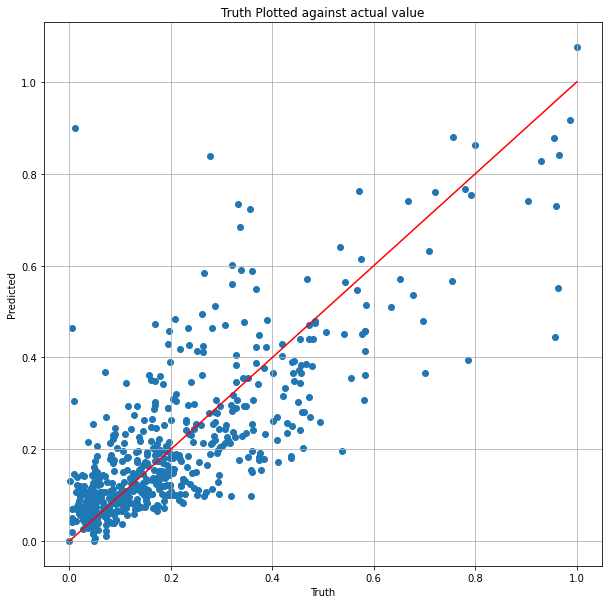

In [74]:
plotRegression(y_train, y_pred_train_LSTM)
plotRegression(y_test, y_pred_test_LSTM)